# Laboratorio 1
## Integrantes
- Daniel Reales (201822265) - Rol: Estudiante 1
- Andres Felipe Garcia Guiza
- Juan David Roa Moyano

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 

## 1. Entendimiento de los datos

In [71]:
df = pd.read_csv('train_data.csv')

In [72]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465


## 2. Preparación de datos y selección de variables

### 2.1 Análisis de distribución de la variable objetivo

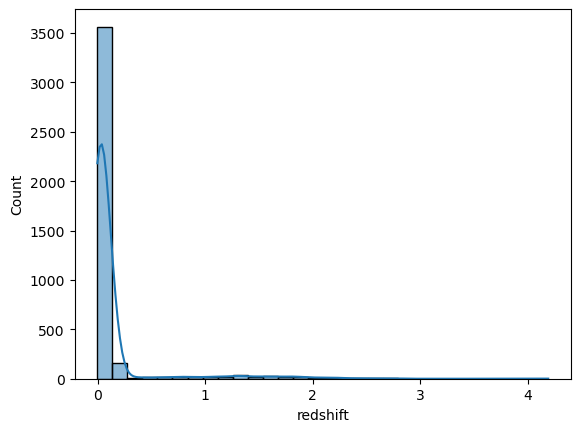

In [73]:
#Distribución de la variable target
sns.histplot(df['redshift'], bins=30, kde=True)
plt.show()

In [74]:
# Vamos a contar los valores que son cercanos a 0 en la variable target
df[df['redshift'] < 0.01].shape[0] / df.shape[0]

0.45925

- Debido a que hay una gran cantidad de valores cercanos a 0 en la variable target, vamos a aplicar una transformación logarítmica a la variable target para que la distribución sea más normal. Antes de ello vamos a asegurarnos de la calidad de los datos siguiendo la metodología ASUM-DM

### 2.2 Selección de variables

- Miraremos que variables hay en el dataset.

In [75]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'score', 'clean', 'class', 'redshift', 'mjd', 'rowv', 'colv'],
      dtype='object')

- La variable objid es simplemente un identificador de la observación, por lo que no es una variable relevante para el modelo.
- Vamos a eliminar la variable objid.

In [76]:
df = df.drop(columns=['objid'])

In [77]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'score',
       'clean', 'class', 'redshift', 'mjd', 'rowv', 'colv'],
      dtype='object')

- Las variables u, g, r, z, i deben ser mayores a 0. Segun el diccionario. Veremos si hay valores negativos.

In [78]:
# Vamos a ver si hay valores negativos en las variables u, g, r, z, i
# Create a dataframe with negative values for each variable
# Vamos a ver si hay valores negativos en las variables u, g, r, z, i
negativos = pd.DataFrame({
    'count': [
        (df['u'] < 0).sum(),
        (df['g'] < 0).sum(),
        (df['r'] < 0).sum(),
        (df['z'] < 0).sum(),
        (df['i'] < 0).sum()
    ]
}, index=['u', 'g', 'r', 'z', 'i'])

print("Valores negativos en cada variable:")
print(negativos['count'])

Valores negativos en cada variable:
u    0
g    0
r    0
z    0
i    0
Name: count, dtype: int64


- Vamos a revisar que la variable score sea un número entre 0 y 1 conforme al diccionario de datos.

In [79]:
# Vamos a revisar que la variable score sea un número entre 0 y 1
# Check if there are any values outside the range [0,1]
invalid_scores = df[(df['score'] < 0) | (df['score'] > 1)]

print("Número de valores de score fuera del rango [0,1]:", len(invalid_scores))
if len(invalid_scores) > 0:
    print("\nValores de score fuera del rango [0,1]:")
    print(invalid_scores['score'])

Número de valores de score fuera del rango [0,1]: 0


In [80]:
#Revisemos que la variable clean sea 0 o 1
df['clean'].value_counts()

clean
1    3582
0     418
Name: count, dtype: int64

In [81]:
#Revisemos que la variable class corresponda a las clases del diccionario de datos including na
df['class'].value_counts()

class
GALAXY    1857
STAR      1629
QSO        292
S          177
G           44
QUASAR       1
Name: count, dtype: int64

In [82]:
#Unificaremos los valores de la variable class segun Estrella (STAR) o Galaxia (GALAXY) o Cuasar (QSO)
df['class'] = df['class'].replace({'S': 'STAR', 'G': 'GALAXY', 'QUASAR': 'QSO'})
df['class'].value_counts()

class
GALAXY    1901
STAR      1806
QSO        293
Name: count, dtype: int64

In [83]:
#Verifiquemos el tipo de dato de la variable mjd
df['mjd'].dtype

dtype('int64')

In [84]:
#Verifiquemos los valores de la variable mjd
df['mjd'].unique()

array([54140, 51955, 51913, 51959, 54562, 53816, 51984, 51613, 51941,
       51986, 51957, 54479, 51985, 56658, 52000, 51689, 51633, 51943,
       54208, 51673, 54567, 54970, 56727, 52931, 51908, 51821, 51690,
       51609, 51615, 51663, 51883, 55621, 51990, 54922, 51930, 51671,
       52027, 53003, 55325, 52023, 52022, 53846, 54746, 51688, 55605,
       51910, 51909, 51637, 55630, 51691, 51901, 51942, 51693, 56745,
       51608, 54213, 55539, 51989, 58930, 54468, 51999, 54552, 53083,
       51879, 54653, 55648, 51662, 51994, 54153, 51665, 55327, 55599,
       51630, 54234, 55565, 55241, 55274, 56749, 52317, 55575, 58462,
       52374, 53242, 53401, 51900, 54652, 54471, 51928, 55543, 54626,
       51612, 55337, 55289, 55644, 54625, 55277, 51692, 54891, 55622,
       55604, 54561, 55574, 54523, 55656, 55246, 51658, 52443, 55631,
       56739, 55350, 58488, 51811, 55352, 55569, 54210, 52017, 55600,
       58932, 55635, 52366, 52930, 51993, 51614, 55323, 55570, 55704,
       55892, 51871,

In [85]:
#Convert julian date to datetime
df['jd'] = pd.to_datetime(df['mjd'], unit='D')
#Verifiquemos el tipo de dato de la variable jd
df['jd'].dtype

dtype('<M8[ns]')

In [86]:
#Convert datetime to numeric
df['jd'] = df['jd'].astype(int)
#Verifiquemos el tipo de dato de la variable jd
df['jd'].dtype
#Verifiquemos los valores de la variable jd
df['jd'].unique()


array([4677696000000000000, 4488912000000000000, 4485283200000000000,
       4489257600000000000, 4714156800000000000, 4649702400000000000,
       4491417600000000000, 4459363200000000000, 4487702400000000000,
       4491590400000000000, 4489084800000000000, 4706985600000000000,
       4491504000000000000, 4895251200000000000, 4492800000000000000,
       4465929600000000000, 4461091200000000000, 4487875200000000000,
       4683571200000000000, 4464547200000000000, 4714588800000000000,
       4749408000000000000, 4901212800000000000, 4573238400000000000,
       4484851200000000000, 4477334400000000000, 4466016000000000000,
       4459017600000000000, 4459536000000000000, 4463683200000000000,
       4482691200000000000, 4805654400000000000, 4491936000000000000,
       4745260800000000000, 4486752000000000000, 4464374400000000000,
       4495132800000000000, 4579459200000000000, 4780080000000000000,
       4494787200000000000, 4494700800000000000, 4652294400000000000,
       4730054400000

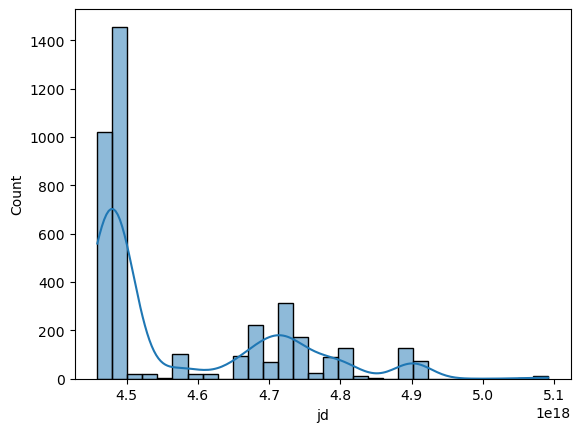

In [87]:
#Borramos la variable mjd
df = df.drop(columns=['mjd'])
#Miremos la distribución de la variable jd
sns.histplot(df['jd'], bins=30, kde=True)
plt.show()

### 2.3 Asum DM. Paso 1: Análisis de datos faltantes

In [88]:
#Revisemos que variables tienen datos faltantes
df.isna().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
score       0
clean       0
class       0
redshift    0
rowv        0
colv        0
jd          0
dtype: int64

In [89]:
df.shape[0]

4000

### 2.4 Asum DM. Paso 2: Datos duplicados


In [90]:
#eliminamos los datos duplicados
df = df.drop_duplicates()
df.shape[0]

3983

### 2.5 Asum DM. Paso 3: Formateo de datos

In [91]:
#Miremos los tipos de datos de las variables
df.dtypes

ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
score       float64
clean         int64
class        object
redshift    float64
rowv        float64
colv        float64
jd            int64
dtype: object

In [92]:
#Hagamos un one hot encoding de la variable class sacando la primera para evitar la multicolinealidad
df = pd.get_dummies(df, columns=['class'], drop_first=True)
df.columns
#Miremos los tipos de datos de las variables
df.dtypes
#Miremos los tipos de datos de las variables
df.dtypes


ra            float64
dec           float64
u             float64
g             float64
r             float64
i             float64
z             float64
run             int64
camcol          int64
field           int64
score         float64
clean           int64
redshift      float64
rowv          float64
colv          float64
jd              int64
class_QSO        bool
class_STAR       bool
dtype: object

In [93]:
#Miremos cuantas observaciones tienen redshift negativo
df[df['redshift'] < 0].shape[0]

646

### 2.6 Asum DM. Paso 4: Datos atípicos

In [94]:
#Vamos a normalizar todas las variables para que queden con una distribución Z-score y evitar datos atípicos
#excepto la variable class que ya es binaria y la variable redshift que es la variable objetivo
cols = [col for col in df.columns if col not in ['class_QSO', 'class_STAR', 'redshift']]
#Apply z-score normalization to selected columns
df[cols] = (df[cols] - df[cols].mean()) / df[cols].std()


array([[<Axes: title={'center': 'ra'}>, <Axes: title={'center': 'dec'}>,
        <Axes: title={'center': 'u'}>, <Axes: title={'center': 'g'}>],
       [<Axes: title={'center': 'r'}>, <Axes: title={'center': 'i'}>,
        <Axes: title={'center': 'z'}>, <Axes: title={'center': 'run'}>],
       [<Axes: title={'center': 'camcol'}>,
        <Axes: title={'center': 'field'}>,
        <Axes: title={'center': 'score'}>,
        <Axes: title={'center': 'clean'}>],
       [<Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'rowv'}>,
        <Axes: title={'center': 'colv'}>, <Axes: title={'center': 'jd'}>]],
      dtype=object)

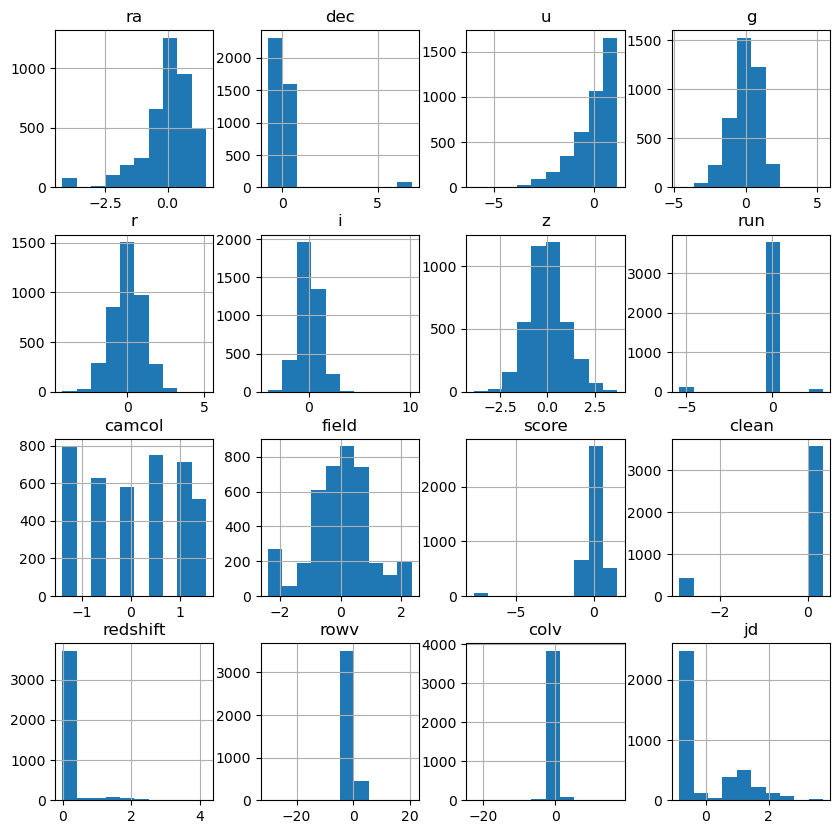

In [95]:
#Miremos la distribución de todas las variables
df.hist(figsize=(10, 10))

### 2.7 Asum DM. Paso 5: Selección de variables

In [96]:
#Miremos la correlación de las variables con la variable objetivo
#Calculate correlations with redshift
correlations = df.corr()['redshift'].sort_values(ascending=False)
print("Correlaciones con la variable redshift:")
print(correlations)




Correlaciones con la variable redshift:
redshift      1.000000
class_QSO     0.865065
r             0.422742
i             0.405845
z             0.398973
g             0.394252
u             0.168132
run           0.052715
ra            0.050318
field         0.041979
colv          0.038045
clean         0.031873
score         0.021321
dec           0.009802
rowv          0.005487
camcol       -0.003844
jd           -0.082456
class_STAR   -0.320275
Name: redshift, dtype: float64


In [97]:
def eliminar_variables_correlacion_baja(df, threshold=0.1):
    # Calculate correlations with redshift
    correlations = df.corr()['redshift'].sort_values(ascending=False)
    # Get columns with correlation below threshold
    low_corr_cols = correlations[correlations.abs() < threshold].index

    # Drop columns with low correlation
    df = df.drop(columns=low_corr_cols)
    return df


In [98]:
df = eliminar_variables_correlacion_baja(df)

In [99]:
df.head()

df.dtypes

u             float64
g             float64
r             float64
i             float64
z             float64
redshift      float64
class_QSO        bool
class_STAR       bool
dtype: object

## 3. Modelo de Regresión Lineal

### 3.1 Ajuste del modelo

In [100]:
X = df.drop(columns=['redshift'])
y = df['redshift']

from sklearn.linear_model import LinearRegression

#Ajustamos el modelo
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [101]:
#Interpretación de los coeficientes
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print(coefficients)

     Variable  Coeficiente
0           u     0.004140
1           g    -0.032369
2           r     0.077380
3           i     0.000132
4           z    -0.032709
5   class_QSO     1.193751
6  class_STAR    -0.079230


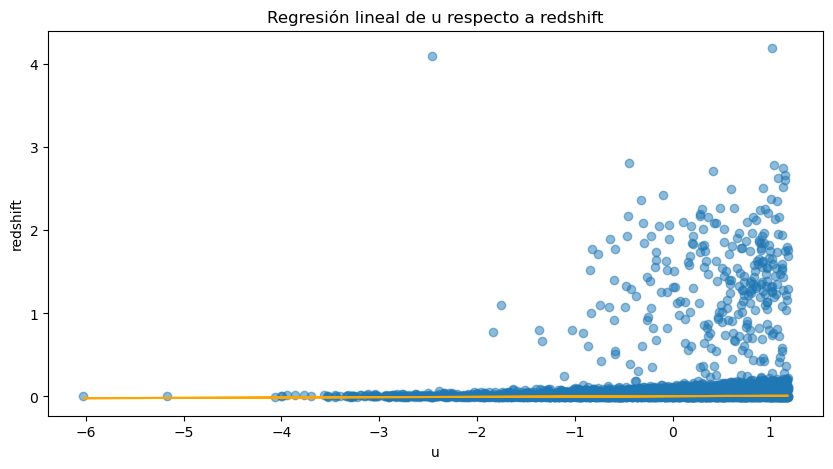

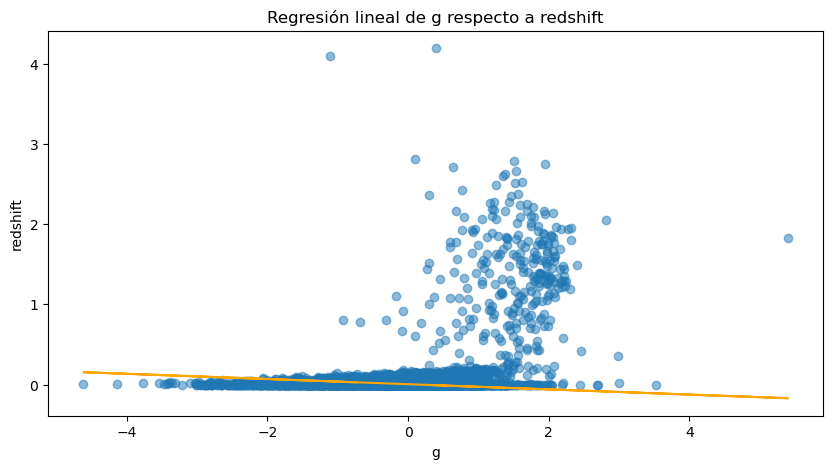

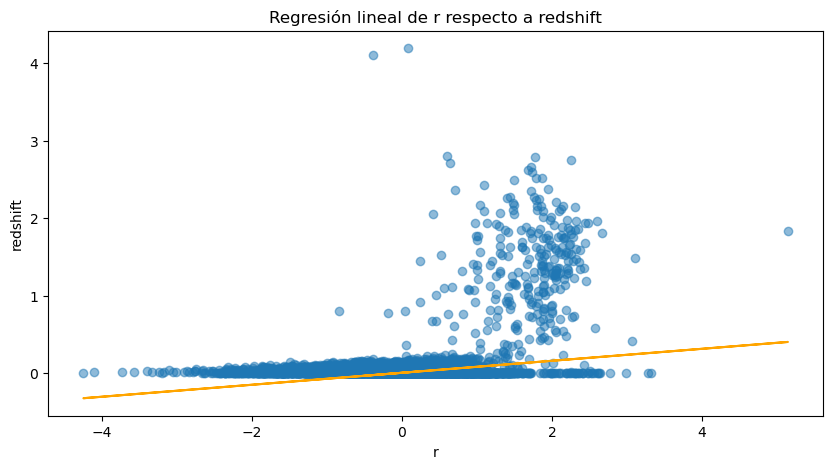

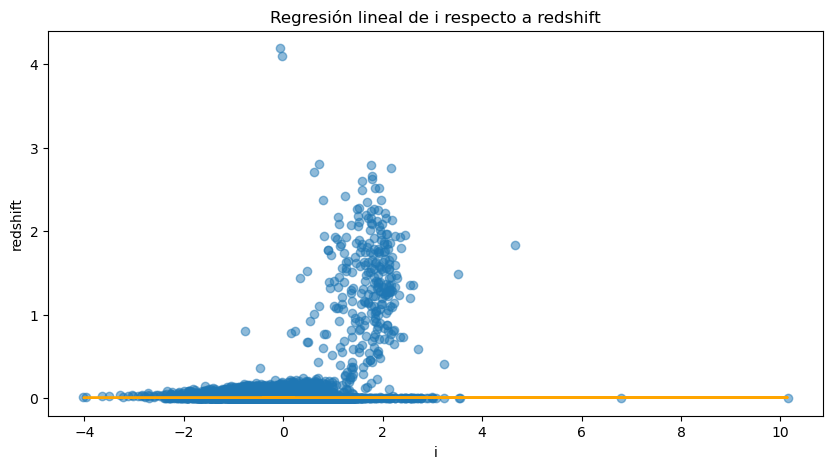

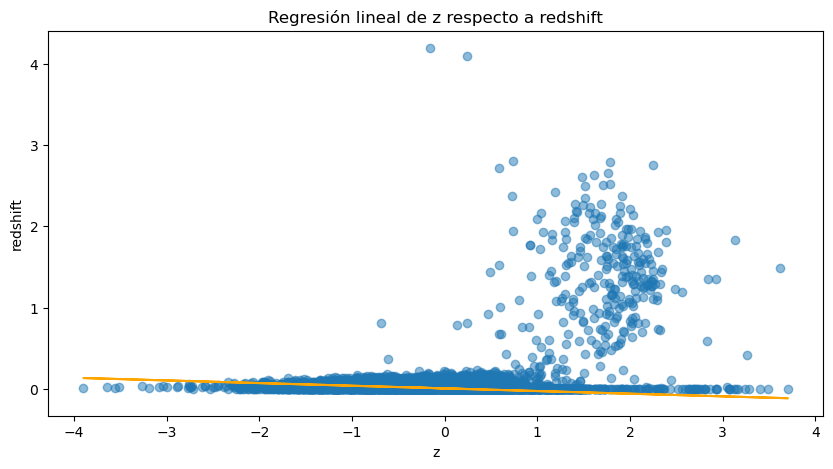

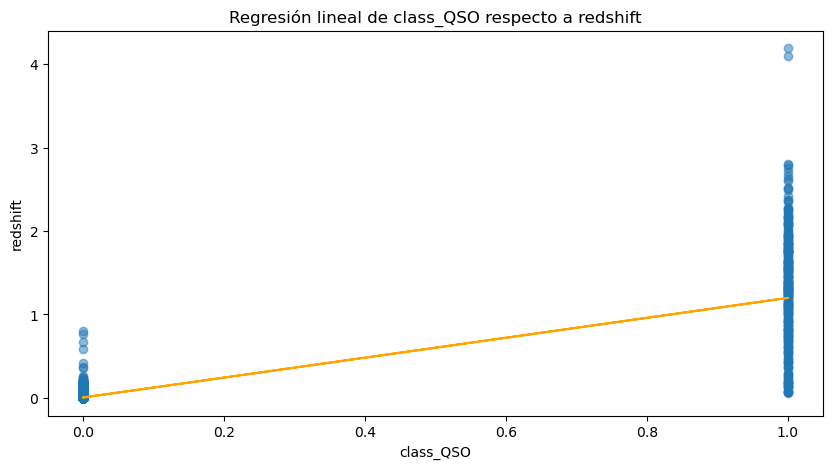

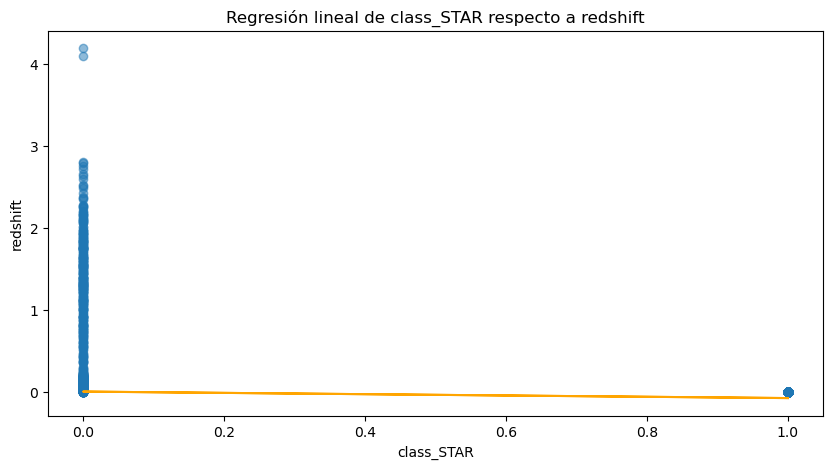

In [102]:
#Regresion lineal por variable con respecto a la variable objetivo con el modelo ajustado
#Utilizando la recta ajustada, veamos el valor de la variable objetivo con respecto 
# a cada variable independiente

for col in coefficients['Variable']:
    plt.figure(figsize=(10, 5))
    plt.scatter(X[col], y, alpha=0.5)
    #Recta de regresión con el modelo ajustado
    m = coefficients.loc[coefficients['Variable'] == col, 'Coeficiente'].values[0]
    b = coefficients['Coeficiente'].values[0]
    plt.plot(X[col], m * X[col] + b, color='orange')
    plt.title(f'Regresión lineal de {col} respecto a redshift')
    plt.xlabel(col)
    plt.ylabel('redshift')
    plt.show()
    
    
    

## 4. Pipeline de preprocesamiento para automatizar el proceso de preprocesamiento

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin


class DeleteVariables(BaseEstimator, TransformerMixin):
    def __init__(self, df):
        self.df = df

    def transform(self):
        #Eliminar la variable objid
        self.df = self.df.drop(columns=['objid'])
        return self.df

    def fit(self):
        return self

        
class EnsureBusinessRules(BaseEstimator, TransformerMixin):
    def __init__(self, df):
        self.df = df

    def transform(self):
        #1. Check that variables u, g, r, z, i are greater than 0
        for col in self.df.columns:
            if col in ['u', 'g', 'r', 'z', 'i']:
                self.df = self.df[self.df[col] > 0]
        #2. Check that score is between 0 and 1
        self.df = self.df[self.df['score'] > 0]
        self.df = self.df[self.df['score'] < 1]
        #3. Check that clean is 0 or 1
        self.df = self.df[self.df['clean'].isin([0, 1])]
        #4. Check that class is either STAR, GALAXY or QSO
        self.df = self.df[self.df['class'].isin(['STAR', 'GALAXY', 'QSO'])]
        #5. Unify class variable into 3 classes: STAR, GALAXY, QSO
        self.df['class'] = self.df['class'].replace({'S': 'STAR', 'G': 'GALAXY', 'Q': 'QSO'})
        #6. Transform mjd to datetime and then to numeric
        self.df['mjd'] = pd.to_datetime(self.df['mjd'])
        self.df['mjd'] = self.df['mjd'].astype(int)
        return self.df

    def fit(self):
        return self


class DuplicateRemoval(BaseEstimator, TransformerMixin):
    def __init__(self, df):
        self.df = df

    def transform(self):
        return self.df.drop_duplicates()
    
    def fit(self):
        return self

class MissingValueImputation(BaseEstimator, TransformerMixin):
    def __init__(self, df):
        self.df = df

    def transform(self):
        #For each column, if it is a categorical variable, fill with the mode
        #If is a numerical variable, fill with the mean
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                self.df[col].fillna(self.df[col].mode()[0], inplace=True)
            else:
                self.df[col].fillna(self.df[col].mean(), inplace=True)
        return self.df

    def fit(self):
        return self

    
class OneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, df, variables):
        self.df = df
        self.variables = variables

    def transform(self):
        return pd.get_dummies(self.df, columns=self.variables, drop_first=True)

    def fit(self):
        return self

class ZScoreNormalization(BaseEstimator, TransformerMixin):
    def __init__(self, df):
        self.df = df

    def transform(self):
        cols = [col for col in self.df.columns if col not in ['class_QSO', 'class_STAR', 'redshift']]

        for col in cols:
            self.df[col] = (self.df[col] - self.df[col].mean()) / self.df[col].std()

        return self.df

    def fit(self):
        return self

class SelectRelevantVariables(BaseEstimator, TransformerMixin):
    def __init__(self, df, target):
        self.df = df
        self.target = target
        
    def fit(self):
        #Droppear las variables que no sean relevantes para el modelo
        #Calcular la correlación de las variables con la variable objetivo
        correlations = self.df.corr()[self.target]
        #Droppear las variables con una correlación menor a 0.1
        self.df = self.df.drop(correlations[correlations.abs() < 0.1].index, axis=1)
        return self
    
    def transform(self, X):
        return self.df


class FitModel(BaseEstimator, TransformerMixin):
    def __init__(self, df, model):
        self.df = df
        self.model = model

    def fit(self):
        X = self.df.drop(columns=['redshift'])
        y = self.df['redshift']
        self.model.fit(X, y)
        return self
    
    def transform(self):
        return self.model
        


In [104]:
# Pipeline de preprocesamiento
test_df = pd.read_csv('train_data.csv')

model = LinearRegression()

pipeline = Pipeline([
    ('delete_variables', DeleteVariables(test_df)),
    ('ensure_business_rules', EnsureBusinessRules(test_df)),
    ('duplicate_removal', DuplicateRemoval(test_df)),
    ('missing_value_imputation', MissingValueImputation(test_df)),
    ('one_hot_encoding', OneHotEncoder(test_df, ['class'])),
    ('z_score_normalization', ZScoreNormalization(test_df)),
    ('select_relevant_variables', SelectRelevantVariables(test_df, 'redshift')),
    ('fit_model', FitModel(test_df, model))
])


pipeline.fit(test_df)
pipeline.transform()


TypeError: DeleteVariables.fit() takes 1 positional argument but 2 were given

In [ ]:
joblib.dump(pipeline, 'assets/modelo.joblib')
print("Modelo exportado con éxito como 'assets/modelo.joblib'")